# Marriage

https://data.world/guilfordcounty/15f377df-8a43-4c06-b3dc-bcffd704b528

In [79]:
import sys, getopt
import pandas as pd
import json
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from scipy import stats
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = [16,5]

# 1) Graficar y describir observaciones

In [45]:
period=90

inputfile="both_sexes.csv"
print('Input file is:', inputfile)
df = pd.read_csv(inputfile)
df = df.set_index(pd.DatetimeIndex(df['RecDate']))
df.sort_index(ascending=True, inplace=True)
df["Count"] = 1
df = df["Count"]

Input file is: both_sexes.csv


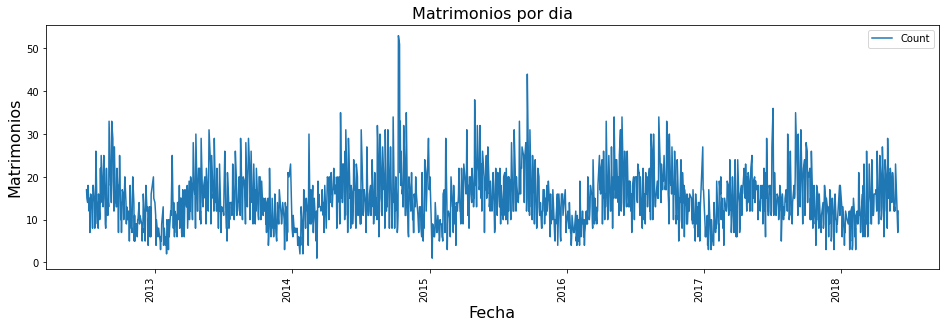

In [46]:
matplotlib.rcParams['figure.figsize'] = [16,5]
plt.figure()
ax = df.groupby("RecDate").count().plot(y='Count', rot=90)
ax.set_title("Matrimonios por dia", fontsize=16)
ax.set_ylabel("Matrimonios", fontsize=16)
ax.set_xlabel("Fecha", fontsize=16)
plt.legend(loc='best')
plt.show()

### La evolución de la cantidad de matrimonios a través de los años presenta cierta estabilidad, a pesar de los picos observables. A simple vista parece estacionaria y con una estacionalidad del tipo anual. Con picos mínimos anuales de como máximo 10 casamientos y con picos de entre 30 y  50 casamientos.

# 2) Descomponer una serie usando el modelo aditivo de 4 componentes. Extraer la tendencia. 

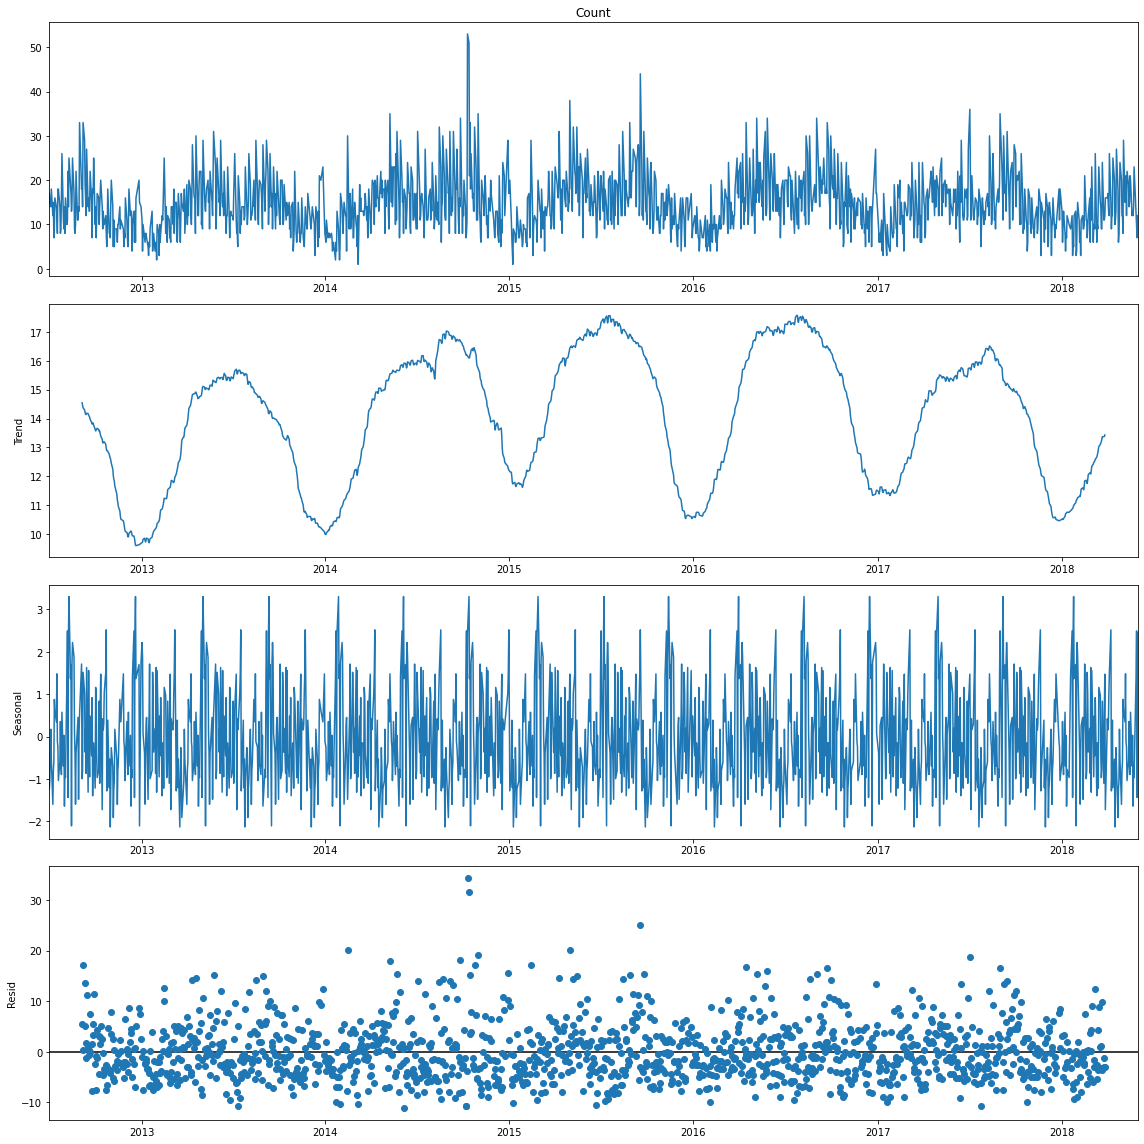

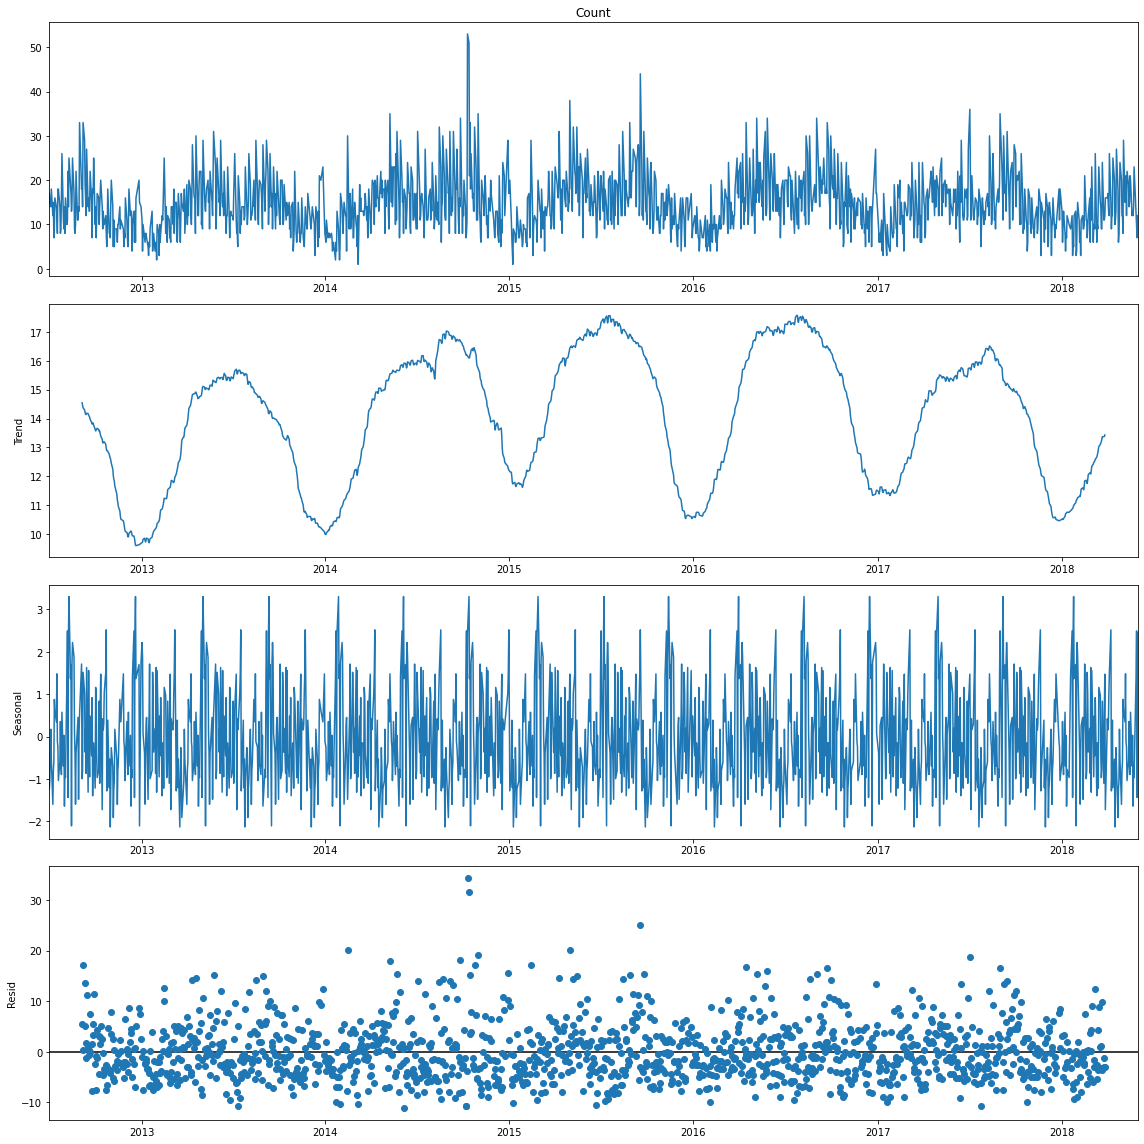

In [47]:
matplotlib.rcParams['figure.figsize'] = [16,16]
df = df.groupby("RecDate").count()
addit = sm.tsa.seasonal_decompose(df, model='additive', period=period)
addit.plot()

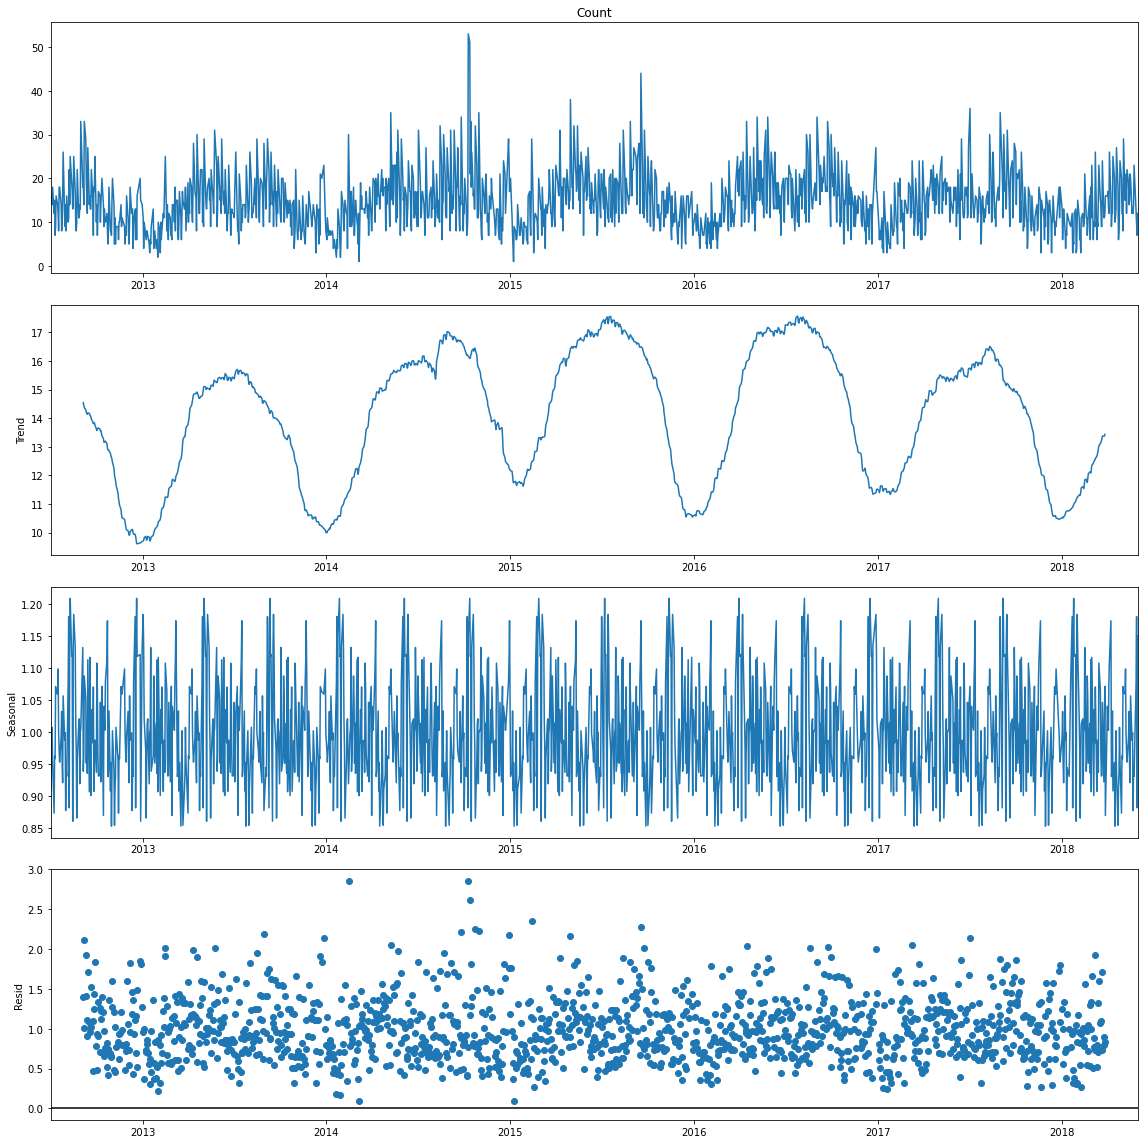

In [48]:
# Multiplicative
mult = sm.tsa.seasonal_decompose(df, model='multiplicative', period=period)
mult.plot(); plt.show()

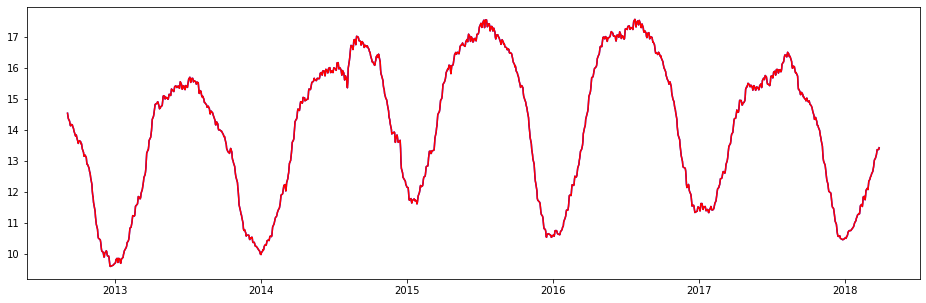

In [49]:
matplotlib.rcParams['figure.figsize'] = [16,5]
period=90
addit = sm.tsa.seasonal_decompose(df, model='additive', period=period)
mult = sm.tsa.seasonal_decompose(df, model='multiplicative', period=period)
plt.plot(addit.trend, color="blue")
plt.plot(mult.trend, color="red")
plt.show()
plt.show()

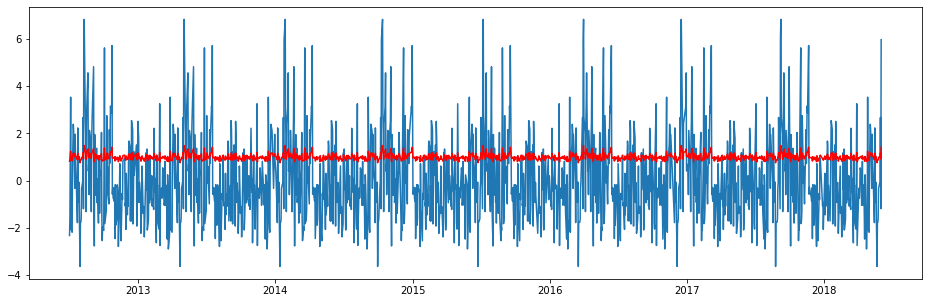

In [50]:
matplotlib.rcParams['figure.figsize'] = [16,5]
period=180
addit = sm.tsa.seasonal_decompose(df, model='additive', period=period)
mult = sm.tsa.seasonal_decompose(df, model='multiplicative', period=period)
plt.plot(addit.seasonal)
plt.plot(mult.seasonal, color="red")
plt.show()
plt.show()

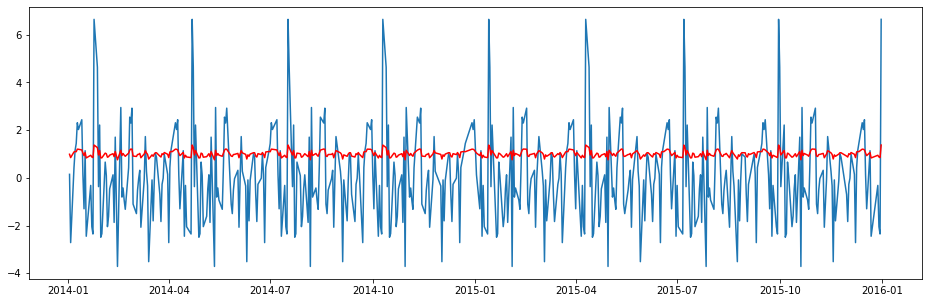

In [51]:
# viendo solo 3 años para observar mejor
matplotlib.rcParams['figure.figsize'] = [16,5]
period=60
temp_df = df["2014":"2015"]
addit = sm.tsa.seasonal_decompose(temp_df, model='additive', period=period)
mult = sm.tsa.seasonal_decompose(temp_df, model='multiplicative', period=period)
plt.plot(addit.seasonal)
plt.plot(mult.seasonal, color="red")
plt.show()
plt.show()

### Al ver la descomposición de la serie, se puede observar una tendencia anual clara, que a comienzo del año empieza a crecer y a partir de la mitad del año empieza a decrecer.

### También se puede ver que tiene una clara estacionalidad fuerte a pesar de tener mucho ruido.

### Es estacionaria porque la pinta no cambia en el tiempo.

# Ajustar un modelo determinístico

Ajustando un modelo determinístico cíclico

In [55]:
sig = df.reset_index().Count
N = 367 # days
sample = 2 # years

dataframe = pd.Series(sig)
ts = pd.DataFrame(dataframe.values)
rows = int(len(ts)/N)
data = ts.values.reshape(rows, N)
betas = data.mean(axis=0)
est = np.tile(betas,rows)

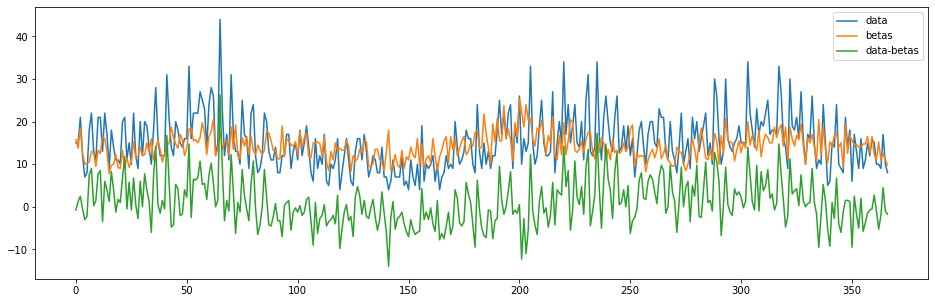

In [56]:
plt.plot(data[sample,:])
plt.plot(betas)
plt.plot(data[sample,:]-betas)
plt.legend(['data','betas','data-betas'])
plt.show()

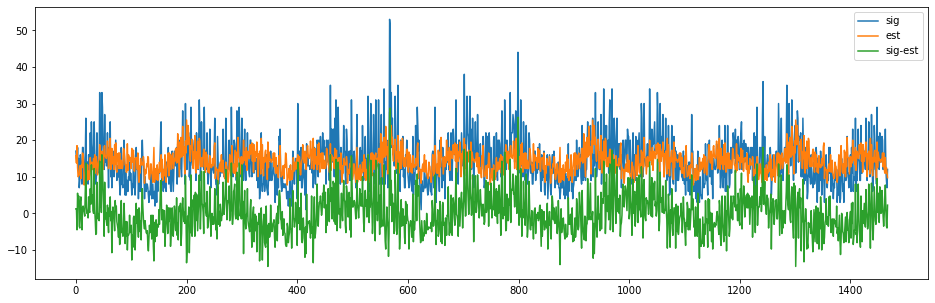

In [57]:
plt.plot(sig)
plt.plot(est)
plt.plot(sig-est)
plt.legend(['sig','est','sig-est'])
# plt.legend(['sig','est'])
plt.show()

# Relacion con el contexto????
# Conclusiones de la validez del modelo ?

# Preprocesamiento
## Transformacion de box-cox

/Users/flor/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/flor/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


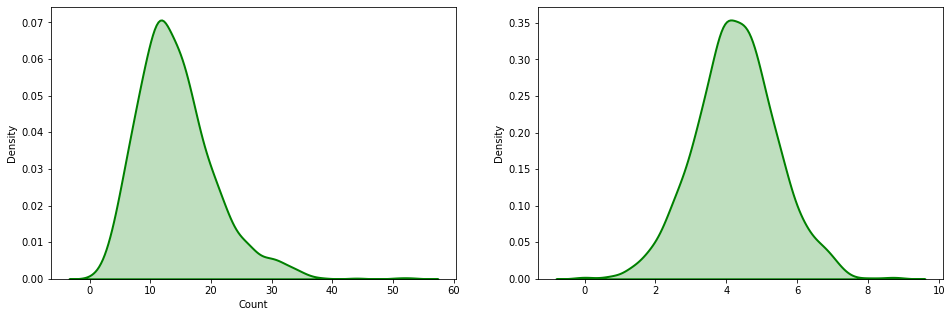

In [65]:
original_data = df.reset_index().Count
fitted_data, fitted_lambda = stats.boxcox(original_data)
fig, ax = plt.subplots(1, 2)
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(16)

<AxesSubplot:xlabel='RecDate'>

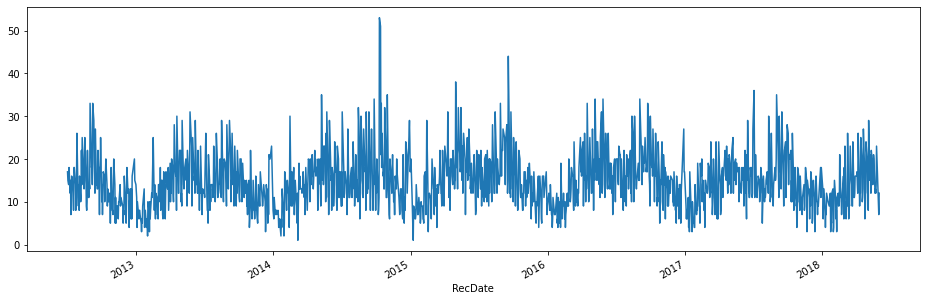

In [69]:
pd.Series(df).plot()

In [74]:
temp = df.reset_index()
temp["fitted_data"] = fitted_data
fitted_data = temp.set_index(pd.DatetimeIndex(temp['RecDate']))["fitted_data"]

<AxesSubplot:xlabel='RecDate'>

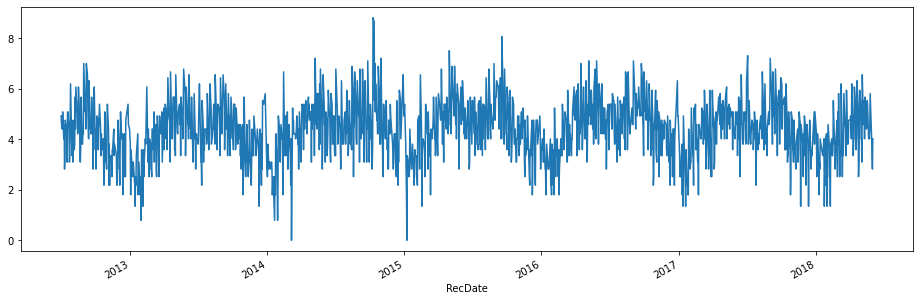

In [75]:
pd.Series(fitted_data).plot()

## Media movil

<AxesSubplot:xlabel='RecDate'>

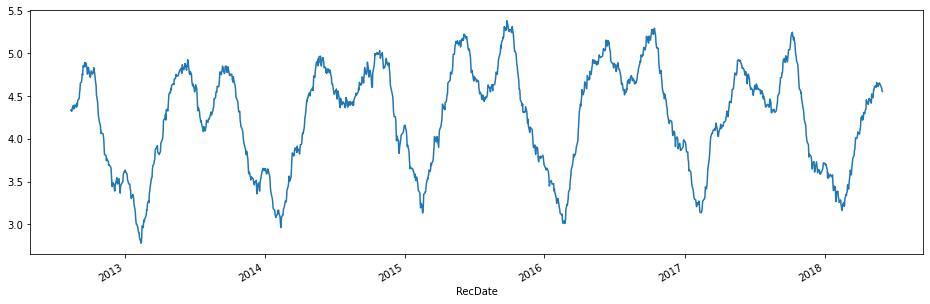

In [76]:
media_movil = pd.Series(fitted_data).rolling(30).mean()
media_movil.dropna(inplace=True)
media_movil.plot()

## Autocorrelacion y estacionariedad: 

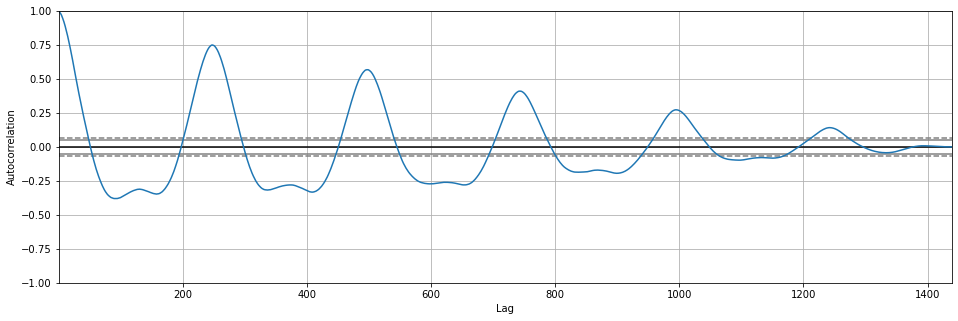

In [77]:
x = pd.plotting.autocorrelation_plot(media_movil)
 
# plotting the Curve
x.plot()
 
# Display
plt.show()

En la gráfica de correlación, el eje Y varía entre -1 y 1, en -1 indica una correlación negativa, cerca de +1 indica una correlación positiva.

Si hay muchos datos aleatorios (correlación debil) la línea estaría cerca del 0.

Entonces se puede concluir que los datos estan fuertemente correlacionados, menos al final.

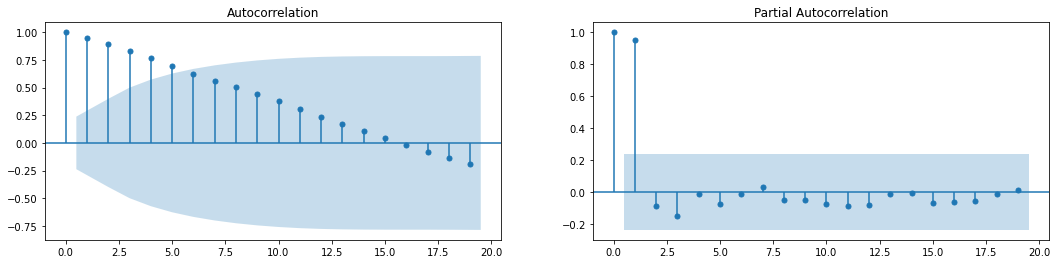

In [80]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
plot_acf(np.log(media_movil).iloc[:68], ax=ax[0])
plot_pacf(np.log(media_movil).iloc[:68], method='ywm', ax=ax[1]);

Como alcanza valores nulos en la autocorrelación, puede ser que sea estacionaria.